# Pymaceuticals Inc.
---

### Analysis

Summary Statistics:
-	Capomulin and Ramicane seem to have performed the best with their mean & median tumor volumes being the lowest compared to the other drug regimens. Naftisol performed the worst. Even the Placebo regimen performed better than Naftisol which could support an argument that the drug potentially increases tumor volume. 

Bar & Pie Charts:
-	Based off the visualized data in the bar charts, the two best performing drugs (Capomulin & Ramicane) had the most # of observed timepoints, meaning that the mice treated by those drugs lived longer. 
-	The pie charts don’t show any significant patterns in the data because the percentage of male to female mice is relatively equal. However, one could argue that the purpose of the pie chart was to eliminate sex as a variable in the overall analysis. 

Quartiles, Outliers and Boxplots:
-	After narrowing down the analysis to just four drugs (Capomulin, Ramicane, Infubinol & Ceftamin), we performed a statistical analysis to determine if there were any outliers. The results were that only one mouse undergoing the Infubinol drug treatment possessed a tumor volume far lower than its other observations (Mouse ID: c326, Timepoint: 31). This could be seen as an argument for Infubinol being inconsistent or unpredictable compared to the other regimens. 

Line Chart:
-	The line chart illustrates the results of a random mouse (m601) undergoing the Capomulin drug treatment. The results show a negative sloping line which supports the argument of Capomulin being successful at reducing overall tumor volume. 

Correlation & Regression:
-	The scatter plot & regression line shows correlation between average tumor volume and a test subject’s weight. Concluding that a heavier mouse is most likely to have a larger tumor. 

 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [91]:
# Checking the number of mice.
num_mice = df['Mouse ID'].nunique()

In [92]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_df = df[df.duplicated(['Mouse ID', 'Timepoint'], keep='last')]

#display what Mouse ID has duplicates. 
dup_id = dup_df['Mouse ID'].unique()

#converting value into string to make it easier to reference later.
dup_id = ''.join(dup_id)
print(dup_id)

g989


In [93]:
# Optional: Get all the data for the duplicate mouse ID. 
print(df.loc[df['Mouse ID'] == dup_id])

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   
870     g989         25           56.045564                 1     Propriva   
871     g989         30           59.082294                 1   

In [94]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df.drop(df[df['Mouse ID'] == dup_id].index)


In [95]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = df['Mouse ID'].nunique()
num_mice_clean

248

## Summary Statistics

In [96]:
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tv = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tv = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tv = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev_tv = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_err_tv = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


In [98]:
# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tv,
    'Median Tumor Volume': median_tv,
    'Tumor Volume Variance': variance_tv,
    'Tumor Volume Std. Dev.': std_dev_tv,
    'Tumor Volume Std. Err.': std_err_tv
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


(0.0, 1.0, 0.0, 1.0)

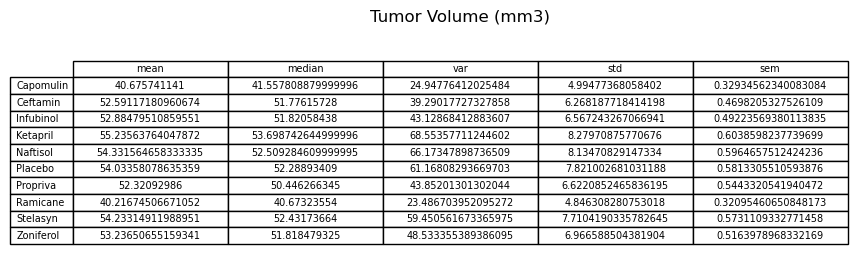

In [99]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_agg = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    'mean',
    'median',
    'var',
    'std',
    'sem'
])

#Using matplotlab, displayed dataframe with a table title

fig = plt.figure(figsize = (10, .4))
ax = fig.add_subplot(111)

ax.table(cellText = summary_df_agg.values, rowLabels = summary_df_agg.index,
         colLabels = summary_df_agg.columns, cellLoc='center')

ax.set_title('Tumor Volume (mm3)')

ax.axis('off')

## Bar and Pie Charts

[Text(0.5, 0, 'Drug Regimen'),
 Text(0, 0.5, '# of Observed Mouse Timepoints'),
 Text(0.5, 1.0, 'Total Timepoints for Each Drug Regimen (Pandas)')]

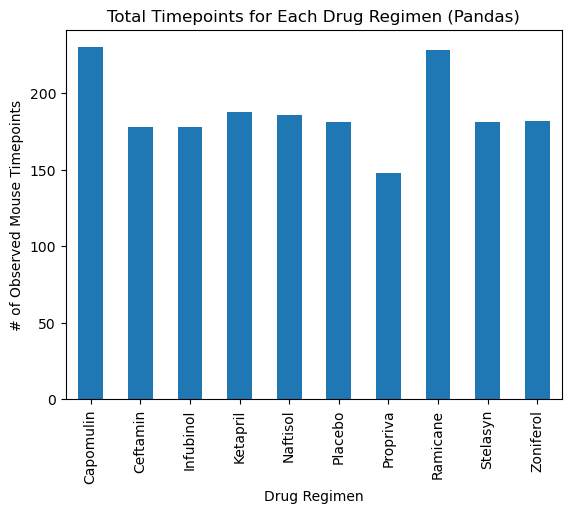

In [100]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_charts_df = df.groupby('Drug Regimen')['Mouse ID'].count()

pd_bar_chart = bar_charts_df.plot(kind = 'bar')

pd_bar_chart.set(xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', title = 'Total Timepoints for Each Drug Regimen (Pandas)')




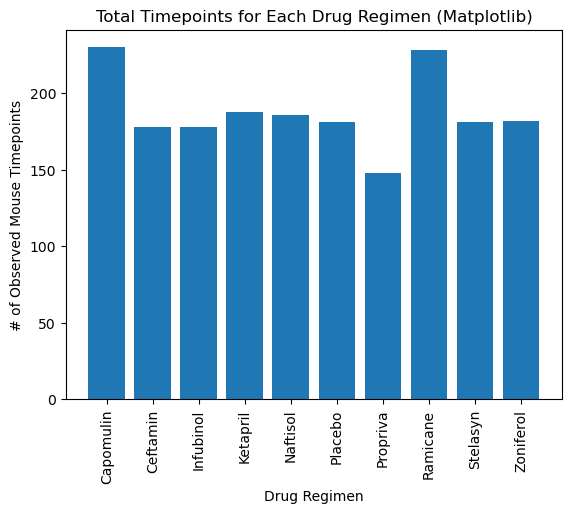

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_charts_df.index, bar_charts_df.values)
plt.title('Total Timepoints for Each Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sex'>

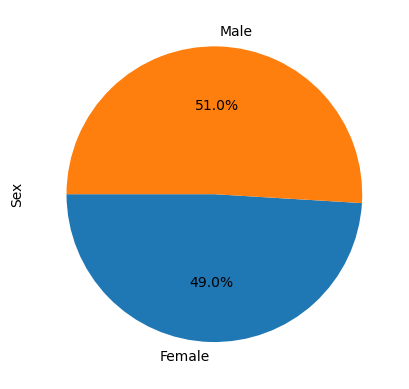

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_charts_df = df.groupby('Sex')['Sex'].count()
pie_charts_df.plot(kind='pie', autopct='%1.1f%%', startangle = 180)

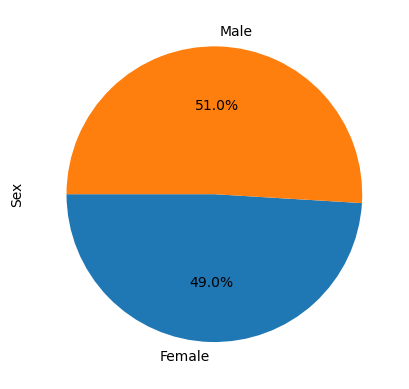

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_charts_df, labels = pie_charts_df.index, autopct='%1.1f%%', startangle = 180)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_data = pd.merge(last_timepoint, df, on=['Mouse ID', 'Timepoint'], how='inner')

In [105]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Loop through each drug treatment to collect tumor volume data
for treatment in treatment_names:
    # Locate the rows which contain mice on each drug
    treatment_data = final_tumor_data[final_tumor_data['Drug Regimen'] == treatment]
    
    # add subset
    tumor_volumes = treatment_data['Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    iqr = upperq - lowerq

    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | (treatment_data['Tumor Volume (mm3)'] > upper_bound)]

    # Results
    if outliers.empty:
        print(f"{treatment} Outlier's = 0")
    else:
        print(f"{treatment} Outlier's = {outliers[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]}")


Capomulin Outlier's = 0
Ramicane Outlier's = 0
Infubinol Outlier's =    Mouse ID  Timepoint  Tumor Volume (mm3)
31     c326          5           36.321346
Ceftamin Outlier's = 0


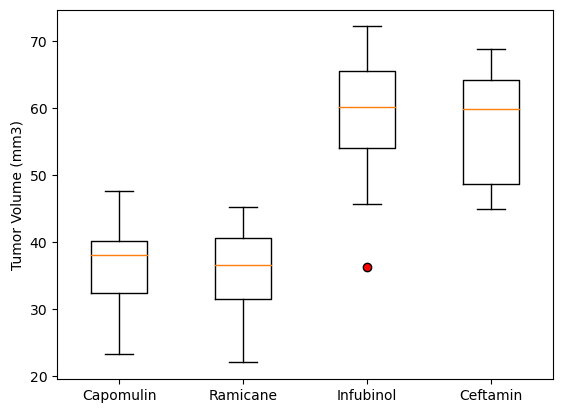

In [106]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatment_names, flierprops={'marker': 'o', 'markerfacecolor': 'red'})
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

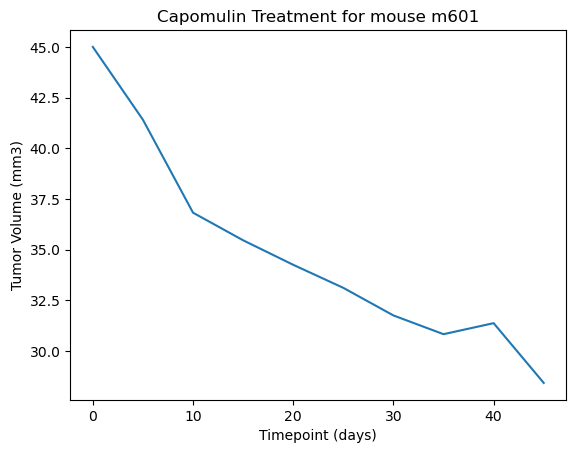

In [107]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
m601_df = df[(df['Drug Regimen'] == 'Capomulin') & (df['Mouse ID'] == 'm601')]

plt.plot(m601_df['Timepoint'], m601_df['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment for mouse m601')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

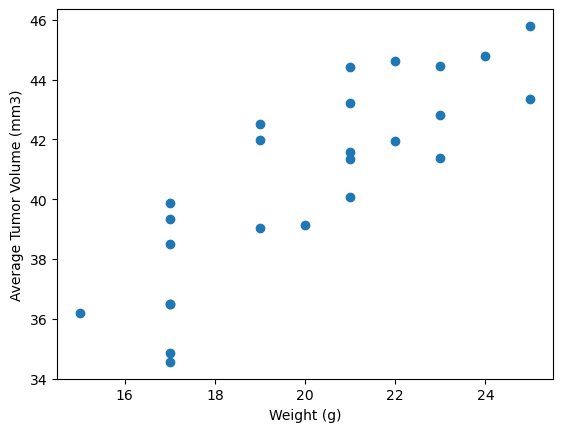

In [108]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = df[df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(weight, avg_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The Correlation Coefficient of Average Tumor Volume & Mouse Weight = 0.84


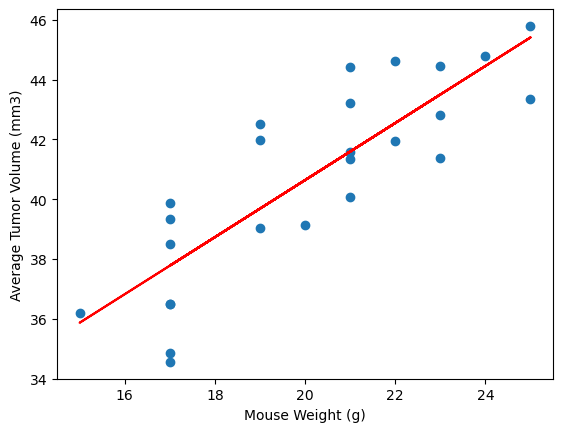

In [109]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = round(avg_tumor_volume.corr(weight), 2)
slope, intercept, r_value, p_value, std_err = st.linregress(weight, avg_tumor_volume)
predicted_tumor_volume = slope * weight + intercept

# Scatter plot
plt.scatter(weight, avg_tumor_volume, marker='o', label='Data Points')
plt.plot(weight, predicted_tumor_volume, 'r-', label='Linear Regression')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#Results
print(f"The Correlation Coefficient of Average Tumor Volume & Mouse Weight = {correlation_coefficient}")

plt.show()
